## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify  
from sklearn.preprocessing import PowerTransformer
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"


## reading the dataset

In [2]:
df = pd.read_csv('flo_data_20k.csv')

In [3]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,30/10/20,26/02/21,21/02/21,26/02/21,4,1,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,08/02/17,16/02/21,16/02/21,10/01/20,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,27/11/19,27/11/20,27/11/20,01/12/19,3,2,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,06/01/21,17/01/21,17/01/21,06/01/21,1,1,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,03/08/19,07/03/21,07/03/21,03/08/19,1,1,49.99,159.99,[AKTIFSPOR]


#### data overview

* master_id: A unique identifier for each customer.
* order_channel: The channel through which the order was placed (e.g., Android App, Desktop).
* last_order_channel: The last channel used to place an order.
* first_order_date: The date when the customer's first order was placed.
* last_order_date: The date of the customer's most recent order.
* last_order_date_online: The date of the last order placed online.
* last_order_date_offline: The date of the last order placed offline.
* order_num_total_ever_online: Total number of orders placed online by the customer.
* order_num_total_ever_offline: Total number of orders placed offline by the customer.
* customer_value_total_ever_offline: Total customer value (monetary amount) from offline orders.
* customer_value_total_ever_online: Total customer value (monetary amount) from online orders.
* interested_in_categories_12: A list of categories that the customer is interested in.





In [4]:
df.shape

(19945, 12)

## stats

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


#### order_num_total_ever_online:

* 25th Percentile (Q1): 1.00
* 50th Percentile (Median, Q2): 2.00
* 75th Percentile (Q3): 4.00
* It appears that most of the data falls within the lower quartiles, with the majority of values clustering around 1.00 and 2.00.

####  'order_num_total_ever_offline'

* 25th Percentile (Q1): 1.00
* 50th Percentile (Median, Q2): 1.00
* 75th Percentile (Q3): 2.00
* the majority of data seems to concentrate in the lower quartiles, particularly around the value of 1.00.

#### 'customer_value_total_ever_offline'

* 25th Percentile (Q1): 99.99
* 50th Percentile (Median, Q2): 179.98
* 75th Percentile (Q3): 319.97
* most of the data falls in the higher quartiles, especially around the values of 179.98 and 319.97.

#### 'customer_value_total_ever_online'

* 25th Percentile (Q1): 149.98
* 50th Percentile (Median, Q2): 286.46
* 75th Percentile (Q3): 578.44
* data seems to be distributed in the higher quartiles, particularly around the values of 286.46 and 578.44.

# Data cleaning

### checking nulls 

In [6]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

### checking data types

In [7]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online            int64
order_num_total_ever_offline           int64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

## Convert
* first_order_date --------------> object
* last_order_date --------------> object
* last_order_date_online --------------> object
* last_order_date_offline --------------> object

In [8]:
# Converting the above mentioned column types from object to datetime format
convert =["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
df[convert] = df[convert].apply(pd.to_datetime)

/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_19342/931020648.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[convert] = df[convert].apply(pd.to_datetime)


/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_19342/931020648.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[convert] = df[convert].apply(pd.to_datetime)
/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_19342/931020648.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[convert] = df[convert].apply(pd.to_datetime)
/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_19342/931020648.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[convert] = df[convert].apply(pd.to_datetime)


In [9]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                   int64
order_num_total_ever_offline                  int64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
dtype: object

#### checking outliers and distribution of data 

In [10]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_df = df[numerical_columns]

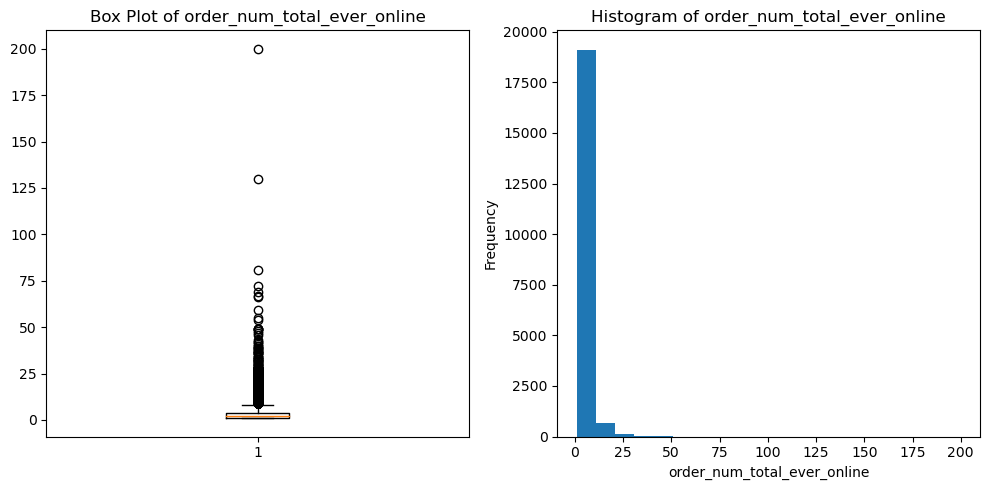

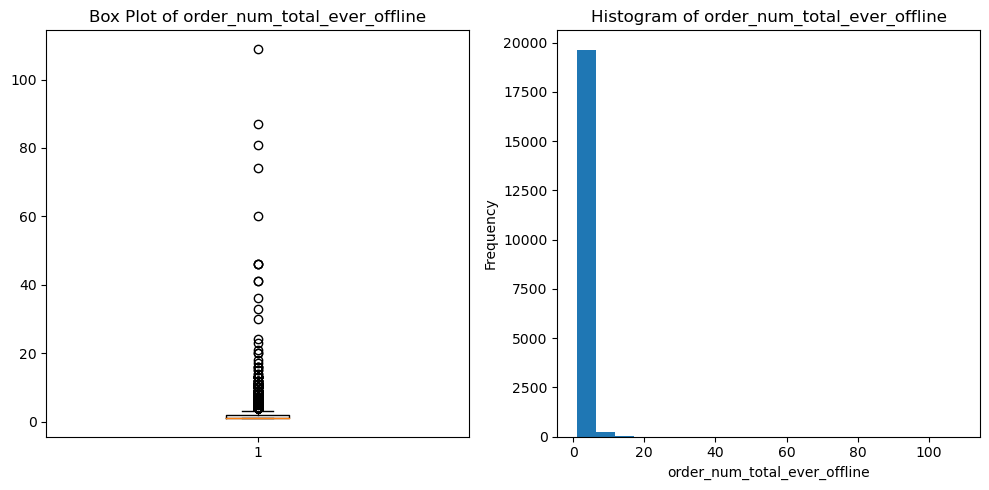

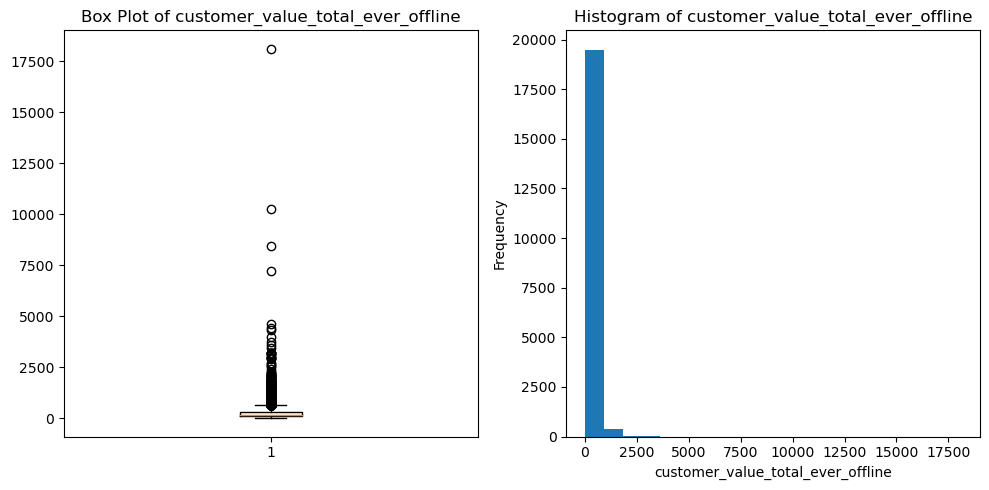

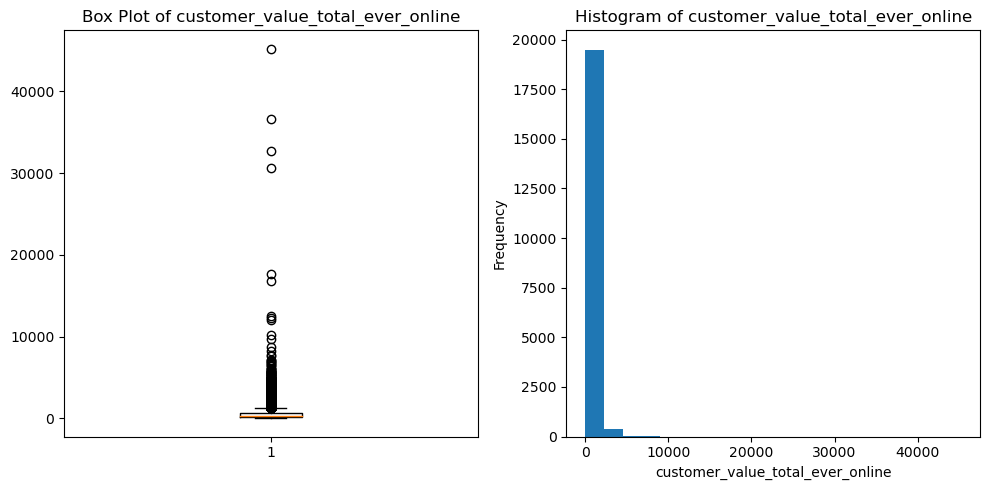

In [11]:
for column in numerical_df.columns:
    if df[column].dtype != 'object':  # Only consider numeric columns
        plt.figure(figsize=(10, 5))
        
        # Box Ploxt
        plt.subplot(1, 2, 1)
        plt.boxplot(df[column])
        plt.title(f'Box Plot of {column}')
        
        # Histogram
        plt.subplot(1, 2, 2)
        plt.hist(df[column], bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

In [12]:
mean_values = numerical_df.mean()

# Calculate the median for each column
median_values = numerical_df.median()

pd.set_option('display.float_format', '{:.2f}'.format)

# Print mean and median values
print("Mean values of columns:")
print(mean_values)
print("\nMedian values of columns:")
print(median_values)

Mean values of columns:
order_num_total_ever_online           3.11
order_num_total_ever_offline          1.91
customer_value_total_ever_offline   253.92
customer_value_total_ever_online    497.32
dtype: float64

Median values of columns:
order_num_total_ever_online           2.00
order_num_total_ever_offline          1.00
customer_value_total_ever_offline   179.98
customer_value_total_ever_online    286.46
dtype: float64


rule says if mean > median then it is right skewed or vice a versa 

In [13]:
#using iqr method to handle outliers as data is skewed 

outliers = {}

for col in numerical_df:
    column_values = numerical_df[col]
    
    Q1 = column_values.quantile(0.25)
    Q3 = column_values.quantile(0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    print(f"Column: '{col}'")
    print(f"low_limit is {low_lim}")
    print(f"up_limit is {up_lim}")
    
    column_outliers = column_values[(column_values < low_lim) | (column_values > up_lim)]
    outliers[col] = column_outliers

    print(f"Count of outliers in column '{col}': {len(column_outliers)}")
    print("\n")


Column: 'order_num_total_ever_online'
low_limit is -3.5
up_limit is 8.5
Count of outliers in column 'order_num_total_ever_online': 1255


Column: 'order_num_total_ever_offline'
low_limit is -0.5
up_limit is 3.5
Count of outliers in column 'order_num_total_ever_offline': 2011


Column: 'customer_value_total_ever_offline'
low_limit is -229.98000000000002
up_limit is 649.94
Count of outliers in column 'customer_value_total_ever_offline': 1191


Column: 'customer_value_total_ever_online'
low_limit is -492.71000000000004
up_limit is 1221.13
Count of outliers in column 'customer_value_total_ever_online': 1583




Column: 'order_num_total_ever_online'

Low Limit: -3.5
Up Limit: 8.5
Count of Outliers: 1255
This column represents the total number of orders made online by customers. The IQR method has identified 1255 data points as outliers, which fall below the lower limit of -3.5 or above the upper limit of 8.5. These outliers might indicate customers with exceptionally high or low online order frequencies. These extreme values could potentially skew the frequency component of the RFM analysis, affecting the segmentation of customers based on their ordering behavior.

Column: 'order_num_total_ever_offline'

Low Limit: -0.5
Up Limit: 3.5
Count of Outliers: 2011
Similar to the online order column, this column represents the total number of orders made offline by customers. The IQR method has identified 2011 outliers that fall outside the range defined by the limits. These outliers could represent customers with unusual offline ordering patterns. Managing these outliers will be essential for an accurate Frequency component in the RFM analysis.

Column: 'customer_value_total_ever_offline'

Low Limit: -229.98
Up Limit: 649.94
Count of Outliers: 1191
This column denotes the total customer value generated from offline orders. The IQR analysis has flagged 1191 data points as outliers. These outliers could indicate customers with either very low or very high spending on offline purchases. Handling these outliers will be crucial to ensure that the Monetary component of the RFM analysis accurately reflects customer spending behavior.

Column: 'customer_value_total_ever_online'

Low Limit: -492.71
Up Limit: 1221.13
Count of Outliers: 1583
Finally, this column represents the total customer value generated from online orders. With 1583 identified outliers, it's evident that there are customers with extreme online spending patterns. Addressing these outliers will be essential to obtain meaningful insights from the Monetary component of the RFM analysis.

In [14]:

def replace_outliers_with_thresholds(dataframe, numerical_columns):
    outliers = {}
    
    for col in numerical_df:
        column_values = dataframe[col]
        
        Q1 = column_values.quantile(0.25)
        Q3 = column_values.quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        # Replace outliers with the threshold values
        dataframe[col] = dataframe[col].clip(lower=low_lim, upper=up_lim)
        return dataframe, outliers

df_copy = df.copy()
df_updated, detected_outliers = replace_outliers_with_thresholds(df_copy, numerical_df)

df_updated.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-06-01,2021-01-17,2021-01-17,2021-06-01,1.00,1,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-03-08,2021-07-03,2021-07-03,2019-03-08,1.00,1,49.99,159.99,[AKTIFSPOR]


In [15]:
negative = df_updated[df_updated['order_num_total_ever_online'] < 0]
negative

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12


In [16]:
numerical_columns = df_updated.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_df = df_updated[numerical_columns]
numerical_df

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
0,4.00,1,139.99,799.38
1,8.50,2,159.97,1853.58
2,3.00,2,189.97,395.35
3,1.00,1,39.99,81.98
4,1.00,1,49.99,159.99
...,...,...,...,...
19940,1.00,2,289.98,111.98
19941,1.00,1,150.48,239.99
19942,2.00,1,139.98,492.96
19943,1.00,5,711.79,297.98


In [17]:
mean_values = numerical_df.mean()

# Calculate the median for each column
median_values = numerical_df.median()

pd.set_option('display.float_format', '{:.2f}'.format)

# Print mean and median values
print("Mean values of columns:")
print(mean_values)
print("\nMedian values of columns:")
print(median_values)

Mean values of columns:
order_num_total_ever_online           2.72
order_num_total_ever_offline          1.91
customer_value_total_ever_offline   253.92
customer_value_total_ever_online    497.32
dtype: float64

Median values of columns:
order_num_total_ever_online           2.00
order_num_total_ever_offline          1.00
customer_value_total_ever_offline   179.98
customer_value_total_ever_online    286.46
dtype: float64


### feature engineering

In [18]:
df = df_updated.copy()

In [19]:
df["total_of_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [20]:
df["total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [21]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_of_purchases,total_expenditure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",10.50,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-06-01,2021-01-17,2021-01-17,2021-06-01,1.00,1,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-03-08,2021-07-03,2021-07-03,2019-03-08,1.00,1,49.99,159.99,[AKTIFSPOR],2.00,209.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-05-07,2020-05-06,2020-05-07,1.00,2,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.00,401.96
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-01-03,2020-12-22,2020-12-22,2020-01-03,1.00,1,150.48,239.99,[AKTIFSPOR],2.00,390.47
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-11-09,2021-05-24,2021-05-24,2019-11-09,2.00,1,139.98,492.96,[AKTIFSPOR],3.00,632.94
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-08-01,1.00,5,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.00,1009.77


In [22]:
df.order_channel.value_counts()

order_channel
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: count, dtype: int64

In [23]:
df.last_order_channel.value_counts()

last_order_channel
Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: count, dtype: int64

## Data visualization

### Distribution of the number of customers in the shopping channels

In [24]:
# the total number of products purchased and the total expenditures.

distribution=df.groupby("order_channel").agg({"master_id":"nunique","total_of_purchases":"sum",
                                 "total_expenditure":"sum"})
distribution.reset_index()

,order_channel,master_id,total_of_purchases,total_expenditure
0,Android App,9495,47516.50,7819062.76
1,Desktop,2735,10551.50,1610321.46
2,Ios App,2833,13920.00,2525999.93
3,Mobile,4882,20437.50,3028183.16


## total purchases v/s order channel

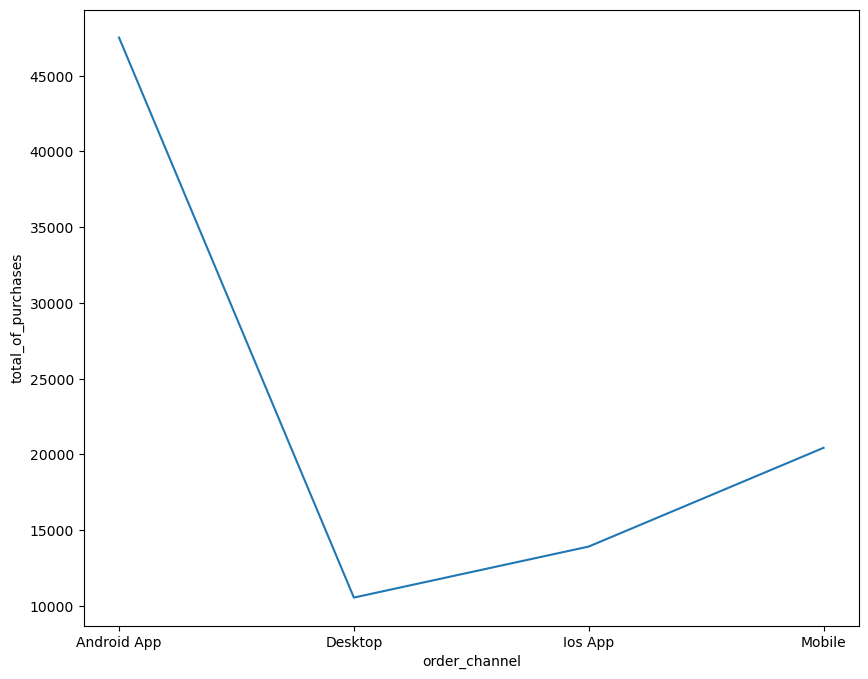

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(data=distribution,x='order_channel',y='total_of_purchases')
plt.show(block=True)


## total expenditure v/s order channel

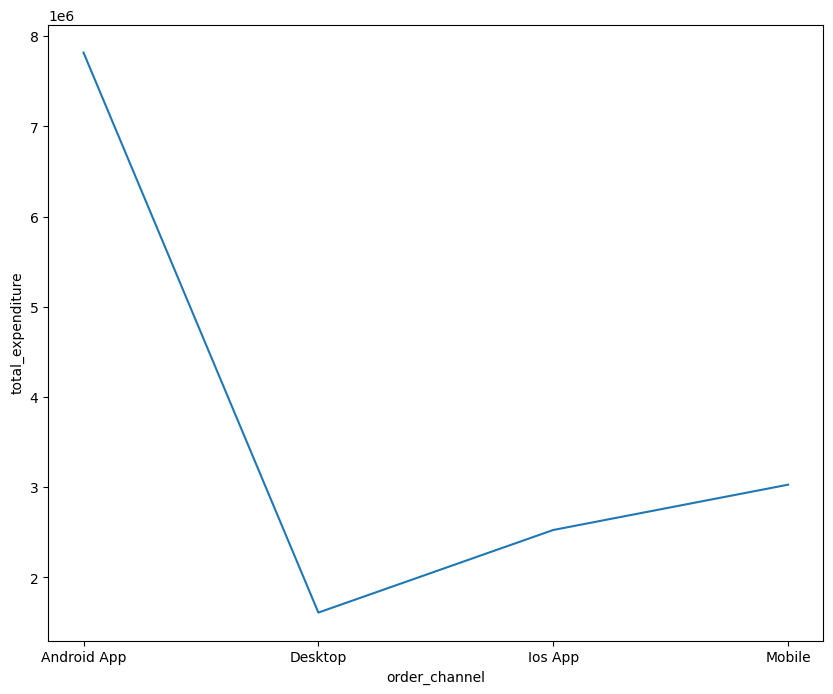

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(data=distribution,x='order_channel',y='total_expenditure')
plt.show(block=True)


## Top 10 shoppers with most revenue

In [27]:
 
Top_10_shoppers=df.groupby('master_id').agg({'total_expenditure': 'sum'}).\
    sort_values(by='total_expenditure', ascending=False).head(10)
Top_10_shoppers.reset_index().head(10)

,master_id,total_expenditure
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
1,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
2,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
3,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
4,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
5,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
6,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
7,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
8,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
9,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


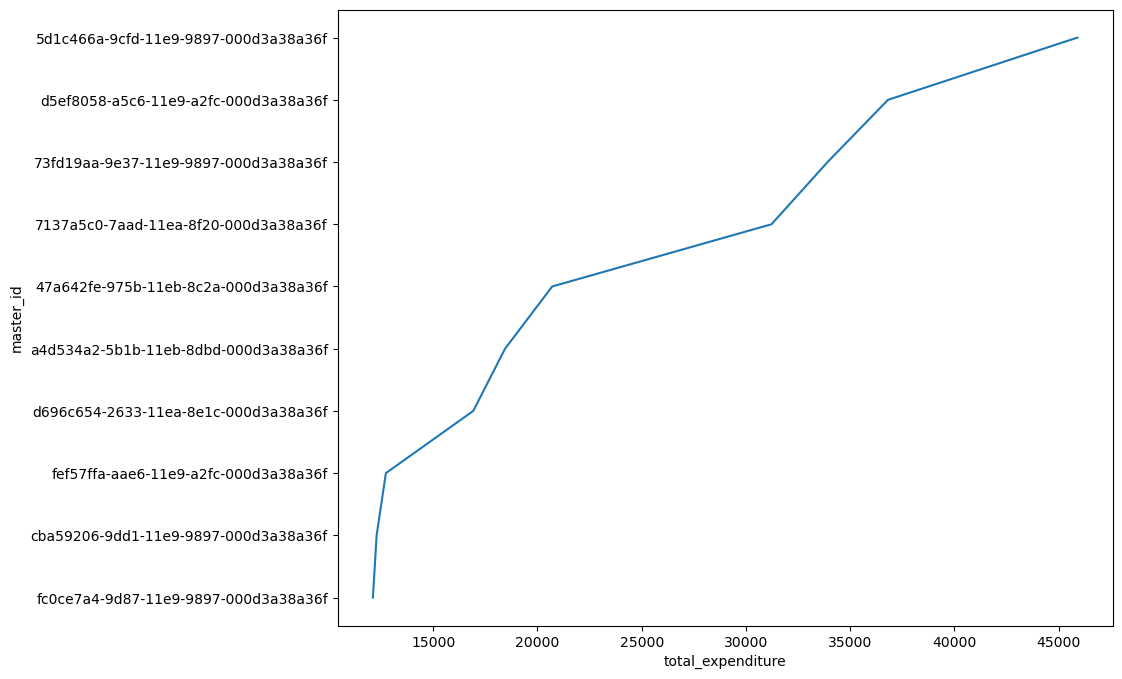

In [28]:
plt.figure(figsize=(10,8))
sns.lineplot(data=Top_10_shoppers,y='master_id',x='total_expenditure')
plt.show(block=True)

## Top 10 customers with the most orders 

In [29]:

Top_10_customers=most_orders=df.groupby('master_id').agg({'total_of_purchases': 'sum'}).\
    sort_values(by='total_of_purchases', ascending=False).head(10)
most_orders
Top_10_customers.reset_index().head(10)

,master_id,total_of_purchases
0,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.00
1,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.00
2,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.00
3,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.00
4,03f502d4-a559-11e9-a2fc-000d3a38a36f,61.00
5,4a51668a-a155-11e9-a2fc-000d3a38a36f,51.00
6,a77882ea-a0d2-11e9-a2fc-000d3a38a36f,48.00
7,695889b4-d6ed-11e9-93bc-000d3a38a36f,47.00
8,e35bbd56-240b-11ea-a30f-000d3a38a36f,47.00
9,e205f2ee-acdf-11e9-a2fc-000d3a38a36f,44.50


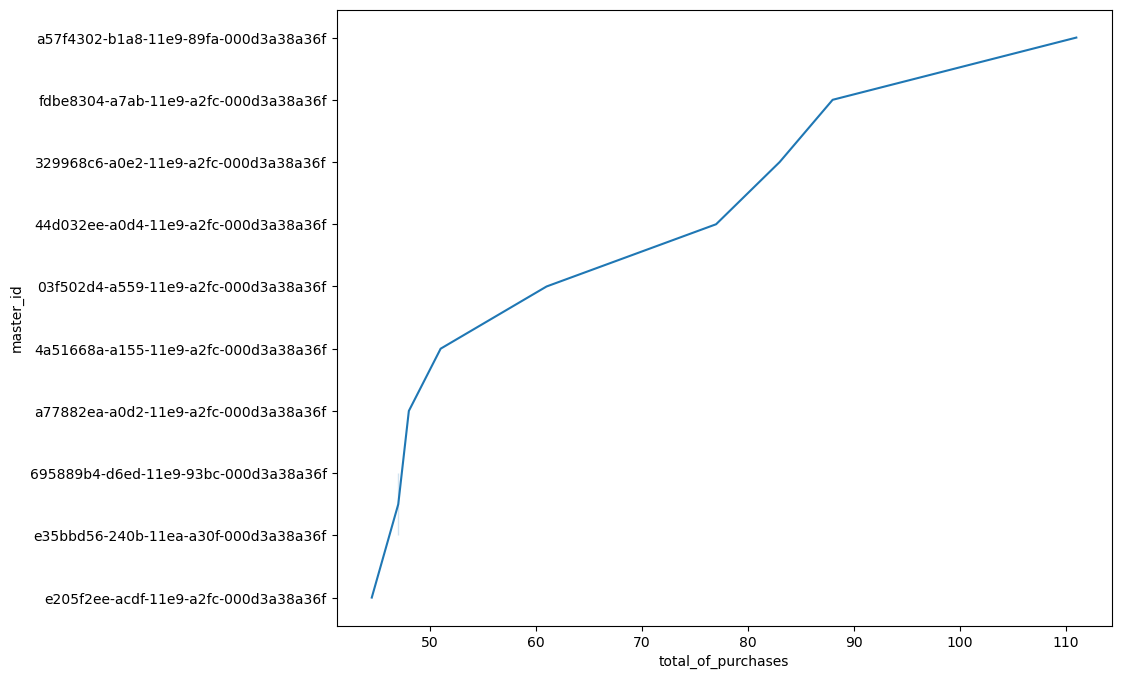

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=Top_10_customers,y='master_id',x='total_of_purchases')
plt.show(block=True)

##  Total spend by customers, both online and offline

In [31]:

df.groupby("master_id")["total_expenditure"].sum().sort_values(ascending=False).head()

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f   45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f   36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f   33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f   31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f   20706.34
Name: total_expenditure, dtype: float64

## Total spend by customers in offline mode

In [32]:
df.groupby("master_id")["customer_value_total_ever_offline"].sum().sort_values(ascending=False).head()

master_id
47a642fe-975b-11eb-8c2a-000d3a38a36f   18119.14
a57f4302-b1a8-11e9-89fa-000d3a38a36f   10239.46
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f    8432.25
695889b4-d6ed-11e9-93bc-000d3a38a36f    7247.60
44d032ee-a0d4-11e9-a2fc-000d3a38a36f    4640.77
Name: customer_value_total_ever_offline, dtype: float64

## Total spend by customers in online 

In [33]:
df.groupby("master_id")["customer_value_total_ever_online"].sum().sort_values(ascending=False).head()

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f   45220.13
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f   36687.80
73fd19aa-9e37-11e9-9897-000d3a38a36f   32654.34
7137a5c0-7aad-11ea-8f20-000d3a38a36f   30688.47
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f   17599.89
Name: customer_value_total_ever_online, dtype: float64

## Total cost of purchase per year (one year!)

In [34]:

one_year = df.groupby("interested_in_categories_12")["total_expenditure"].sum().sort_values(ascending=False).reset_index().head()
one_year

,interested_in_categories_12,total_expenditure
0,[AKTIFSPOR],2373965.87
1,[KADIN],1139066.02
2,[],1136553.55
3,"[KADIN, AKTIFSPOR]",1132049.56
4,[ERKEK],1106934.44


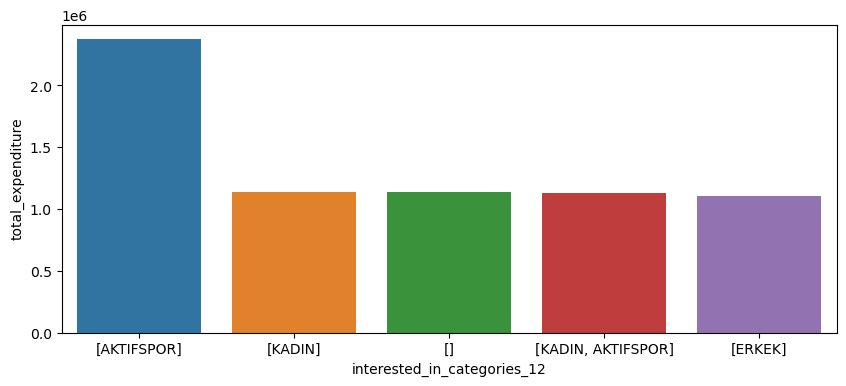

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(data=one_year,x='interested_in_categories_12',y='total_expenditure')
plt.show(block=True)

# RFM ANALYSIS

### RFM METRİCS

In [36]:
# Calculate Recency
from datetime import datetime
current_date = pd.Timestamp(datetime.now().date())
df['Recency'] = (current_date - df['last_order_date']).dt.days

# Calculate Frequency
frequency_data = df.groupby('master_id')['total_of_purchases'].count().reset_index()
frequency_data.rename(columns={'total_of_purchases': 'Frequency'}, inplace=True)
df = df.merge(frequency_data, on='master_id', how='left')

# Calculate Monetary Value
monetary_data = df.groupby('master_id')['total_expenditure'].sum().reset_index()
monetary_data.rename(columns={'total_expenditure': 'MonetaryValue'}, inplace=True)
data = df.merge(monetary_data, on='master_id', how='left')
data.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_of_purchases,total_expenditure,Recency,Frequency,MonetaryValue
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,799.38,[KADIN],5.00,939.37,924,1,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",10.50,2013.55,934,1,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32,1015,1,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-06-01,2021-01-17,2021-01-17,2021-06-01,1.00,1,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97,964,1,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-03-08,2021-07-03,2021-07-03,2019-03-08,1.00,1,49.99,159.99,[AKTIFSPOR],2.00,209.98,797,1,209.98


In [37]:
data.describe()

,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,total_of_purchases,total_expenditure,Recency,Frequency,MonetaryValue
count,19945,19945,19945,19945,19945.00,19945.00,19945.00,19945.00,19945.00,19945.00,19945.00,19945.00,19945.00
mean,2019-03-21 16:52:35.076460288,2021-01-30 03:45:32.895462400,2020-08-21 15:11:00.075206912,2020-05-19 13:29:55.397342720,2.72,1.91,253.92,497.32,4.63,751.24,950.84,1.00,751.24
min,2013-01-04 00:00:00,2020-01-06 00:00:00,2014-01-03 00:00:00,2019-01-02 00:00:00,1.00,1.00,10.00,12.99,2.00,44.98,642.00,1.00,44.98
25%,2019-01-26 00:00:00,2020-11-06 00:00:00,2020-06-14 00:00:00,2019-10-22 00:00:00,1.00,1.00,99.99,149.98,3.00,339.98,846.00,1.00,339.98
50%,2019-07-28 00:00:00,2021-02-17 00:00:00,2020-12-14 00:00:00,2020-06-03 00:00:00,2.00,1.00,179.98,286.46,4.00,545.27,933.00,1.00,545.27
75%,2020-01-01 00:00:00,2021-05-15 00:00:00,2021-04-21 00:00:00,2020-12-25 00:00:00,4.00,2.00,319.97,578.44,6.00,897.78,1036.00,1.00,897.78
max,2021-12-05 00:00:00,2021-12-05 00:00:00,2021-12-05 00:00:00,2021-12-04 00:00:00,8.50,109.00,18119.14,45220.13,111.00,45905.10,1341.00,1.00,45905.10
std,NaN,NaN,NaN,NaN,2.25,2.06,301.53,832.60,3.09,895.40,146.60,0.00,895.40


## Creating RFM SCORE 

In [38]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [39]:

data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

### Recency,Frequency,Monetary Metrics ---> RFM SCORE {(Concat)}

In [40]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)
## Set q=3, dividing the data into 3 equal-sized groups based on the values of the 'RFM_Score'. Each group will correspond to one of the segments specified in the segment_labels list ('Low-Value', 'Mid-Value', 'High-Value').


data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,total_of_purchases,total_expenditure,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,...,5.00,939.37,924,1,939.37,3,3,1,7,Low-Value
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,...,10.50,2013.55,934,1,2013.55,3,3,1,7,Low-Value
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,...,5.00,585.32,1015,1,585.32,3,3,1,7,Low-Value
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-06-01,2021-01-17,2021-01-17,2021-06-01,1.00,1,39.99,...,2.00,121.97,964,1,121.97,3,3,1,7,Low-Value
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-03-08,2021-07-03,2021-07-03,2019-03-08,1.00,1,49.99,...,2.00,209.98,797,1,209.98,4,3,1,8,Mid-Value


In [41]:

segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

1. Low-Value (60%): Customers who haven't purchased recently, don't buy often, and spend less. Likely to churn.(cancel their subscription)

2. Mid-Value (25%): Moderately active customers who spend modestly. More engaged than low-value, but still potential churn candidates.

3. High-Value (15%): Active customers who spend more. Likely to be upsell opportunities and have a lower churn risk.(convinced to purchase more expensive products or services)

In [42]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"


data[['master_id', 'RFM Customer Segments']]

,master_id,RFM Customer Segments
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Potential Loyalists
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Potential Loyalists
2,69b69676-1a40-11ea-941b-000d3a38a36f,Potential Loyalists
3,1854e56c-491f-11eb-806e-000d3a38a36f,Potential Loyalists
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Potential Loyalists
...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,At Risk Customers
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Potential Loyalists
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Potential Loyalists
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Potential Loyalists


* Champions: Customers with high scores for all three factors. These customers are the most valuable to the business and should be targeted with special offers and promotions.
* Potential Loyalists: Customers with high scores for recency and frequency, but low scores for monetary value. These customers are likely to become Champions if they are kept engaged.
* At Risk Customers: Customers with low scores for recency and frequency, but high scores for monetary value. These customers are at risk of churning and should be targeted with retention campaigns.
* Can't Lose: Customers with high scores for recency and monetary value, but low scores for frequency. These customers are valuable, but they may not be engaged with the business as much as they could be.
* Lost: Customers with low scores for all three factors. These customers are unlikely to return to the business and should be removed from marketing lists.

In [43]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

In [44]:
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

In the Champions segment of store, represents valuable customers, the distribution of RFM values appears evenly spread. While no single pattern is prominent

1. High Monetary Value: Most Champions customers show high spending, aligning with their significant value to the company.

2. Low Recency: A minority of Champions customers exhibit low recency, suggesting some may have switched to other brands or reduced engagement.

3. Low Frequency: Another small subset displays low frequency, implying interest in specific items such as new arrivals or seasonal products. rather than frequent shopping.



In [45]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

the frequency value for the Champions segment is 0. This means that there are no customers in the Champions segment who have purchased more than once. This could be due to a number of factors, such as:

The company has a very small number of Champions customers.
The Champions customers are all new customers who have not yet made a second purchase.


In [46]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [47]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

* The company has a small number of Champions customers. This suggests that the company may need to focus on acquiring more customers like these.
* The company has a larger number of Potential Loyalists customers. This suggests that the company may need to focus on retaining these customers and encouraging them to spend more money.
* The company has a large number of At Risk Customers. This suggests that the company may need to focus on re-engaging these customers and encouraging them to start purchasing again.
* The company has a large number of Lost Customers. This suggests that the company may need to focus on win-back strategies to encourage these customers to start purchasing again.
* The company can use the information in the image to develop targeted marketing campaigns that are more likely to be successful. 

* For example, the company could focus on sending special offers and promotions to the Champions customers to encourage them to purchase more often. The company could also focus on providing better customer service to the Potential Loyalists customers to encourage them to spend more money. The company could also focus on re-engaging the At Risk Customers with email campaigns or loyalty programs. And the company could focus on win-back strategies for the Lost Customers, such as sending them personalized emails or offering them discounts.



In [48]:
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,total_expenditure,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,...,939.37,924,1,939.37,3,3,1,7,Low-Value,Potential Loyalists
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,...,2013.55,934,1,2013.55,3,3,1,7,Low-Value,Potential Loyalists
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,...,585.32,1015,1,585.32,3,3,1,7,Low-Value,Potential Loyalists
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-06-01,2021-01-17,2021-01-17,2021-06-01,1.00,1,39.99,...,121.97,964,1,121.97,3,3,1,7,Low-Value,Potential Loyalists
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-03-08,2021-07-03,2021-07-03,2019-03-08,1.00,1,49.99,...,209.98,797,1,209.98,4,3,1,8,Mid-Value,Potential Loyalists


In [49]:
data.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'total_of_purchases',
       'total_expenditure', 'Recency', 'Frequency', 'MonetaryValue',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Value Segment', 'RFM Customer Segments'],
      dtype='object')

## CASES 
### -CASE 1:
For example: FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales.

Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. The id numbers of these customers were saved in the csv file.

In [50]:
SEGMENT_A = data[(data["RFM Customer Segments"]=="champions") | (data["RFM Customer Segments"]=="Potential Loyalists")]
SEGMENT_A.shape[0]

16901

In [51]:
SEGMENT_B = data[(data["interested_in_categories_12"]).str.contains("KADIN")] #7603
SEGMENT_B.shape[0] 

7603

In [52]:
one_case = pd.merge(SEGMENT_A,SEGMENT_B[["interested_in_categories_12","master_id"]],on=["master_id"])
one_case.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments,interested_in_categories_12_y
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1,139.99,...,924,1,939.37,3,3,1,7,Low-Value,Potential Loyalists,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-08-02,2021-02-16,2021-02-16,2020-10-01,8.50,2,159.97,...,934,1,2013.55,3,3,1,7,Low-Value,Potential Loyalists,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-01-12,3.00,2,189.97,...,1015,1,585.32,3,3,1,7,Low-Value,Potential Loyalists,"[ERKEK, KADIN]"
3,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.00,2,150.87,...,909,1,200.86,4,3,1,8,Mid-Value,Potential Loyalists,[KADIN]
4,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-07-03,2021-07-03,2020-01-25,3.00,2,120.48,...,797,1,1054.69,4,3,1,8,Mid-Value,Potential Loyalists,"[ERKEK, COCUK, KADIN]"


In [53]:
#one_case= one_case.drop(one_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)


In [54]:
# Turn the csv format
one_case.to_csv("one_case_customer_information_1-iqr.csv")

## CASE 2:


Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. The ids of the customers in the appropriate profile are saved in the csv file.

In [55]:
SEGMENT_C = data[(data["RFM Customer Segments"]=="Can't Lose") | (data["RFM Customer Segments"]=="Lost") | (data["RFM Customer Segments"]=="At Risk Customers")]
SEGMENT_D = data[(data["interested_in_categories_12"]).str.contains("ERKEK|COCUK")]



In [56]:
second_case = pd.merge(SEGMENT_C,SEGMENT_D[["interested_in_categories_12","master_id"]],on=["master_id"])
second_case

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments,interested_in_categories_12_y
0,d45e704c-b13c-11e9-9757-000d3a38a36f,Desktop,Offline,2019-01-10,2020-01-07,2020-06-27,2020-01-07,1.00,2,330.45,...,1340,1,1095.39,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, KADIN]"
1,ae557c64-5b29-11ea-b304-000d3a38a36f,Android App,Android App,2020-01-23,2020-05-06,2020-05-06,2020-01-30,1.00,2,119.98,...,1220,1,717.93,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,c88819fa-d0fb-11ea-8b59-000d3a38a36f,Mobile,Mobile,2020-07-28,2020-04-08,2020-04-08,2020-07-28,1.00,1,79.99,...,1248,1,359.97,1,3,1,5,Low-Value,At Risk Customers,"[AKTIFCOCUK, ERKEK, COCUK]"
3,7aff7b54-abc4-11e9-a2fc-000d3a38a36f,Mobile,Offline,2016-01-18,2020-05-07,2018-01-29,2020-05-07,5.00,2,179.97,...,1219,1,650.91,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, KADIN]"
4,5af055ee-a066-11ea-9d0a-000d3a38a36f,Mobile,Mobile,2020-09-24,2020-04-12,2020-04-12,2020-09-24,1.00,1,24.99,...,1244,1,466.97,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, COCUK, AKTIFSPOR]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,af0f59d0-a815-11e9-a2fc-000d3a38a36f,Desktop,Offline,2020-08-13,2020-03-11,2020-08-13,2020-03-11,1.00,1,150.73,...,1276,1,220.72,1,3,1,5,Low-Value,At Risk Customers,"[COCUK, KADIN, AKTIFSPOR]"
551,8ef8cfc4-606f-11ea-8dd8-000d3a38a36f,Desktop,Offline,2020-01-28,2020-01-07,2020-01-28,2020-01-07,1.00,1,40.49,...,1340,1,238.48,1,3,1,5,Low-Value,At Risk Customers,[ERKEK]
552,13a5e98c-a824-11e9-a2fc-000d3a38a36f,Android App,Offline,2015-03-23,2020-05-11,2020-06-28,2020-05-11,7.00,2,210.72,...,1215,1,1174.00,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, KADIN, AKTIFSPOR]"
553,9777eb76-bed4-11ea-958c-000d3a38a36f,Desktop,Offline,2020-05-07,2020-02-12,2020-11-28,2020-02-12,1.00,2,390.96,...,1304,1,534.95,1,3,1,5,Low-Value,At Risk Customers,"[ERKEK, KADIN]"


In [57]:
#second_case= second_case.drop(second_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)

In [58]:
# Turn the csv format

second_case.to_csv("second_case_customer_information_2-iqr.csv",index=False)

### product recommendations

In [59]:


# Explode the brand names into separate rows
brand_names = data.explode('interested_in_categories_12')

# Sample transaction data (replace with your actual transaction data)
transaction_data = brand_names[['Value Segment', 'interested_in_categories_12']]

# Calculate brand popularity within each RFM segment
brand_popularity = transaction_data.groupby(['Value Segment', 'interested_in_categories_12']).size().reset_index(name='Count')

# Rank brands within each RFM segment based on popularity
brand_rankings = brand_popularity.sort_values(by=['Value Segment', 'Count'], ascending=[True, False])

# Recommend top-ranked brands to customers in each segment
def recommend_brands(segment):
    top_brands = brand_rankings[brand_rankings['Value Segment'] == segment].head(3)  # Top 3 brands per segment
    return top_brands

# Example: Recommend brands for the 'Low-Value' segment
recommended_brands_low_value = recommend_brands('Low-Value')
print("Recommended Brands for Low-Value Segment:")
print(recommended_brands_low_value)

# Print the entire DataFrame
brand_rankings


Recommended Brands for Low-Value Segment:
   Value Segment interested_in_categories_12  Count
16     Low-Value                 [AKTIFSPOR]   2041
30     Low-Value                     [KADIN]   1361
28     Low-Value                     [ERKEK]   1341


,Value Segment,interested_in_categories_12,Count
16,Low-Value,[AKTIFSPOR],2041
30,Low-Value,[KADIN],1361
28,Low-Value,[ERKEK],1341
29,Low-Value,"[KADIN, AKTIFSPOR]",700
21,Low-Value,"[ERKEK, AKTIFSPOR]",674
...,...,...,...
74,High-Value,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",14
72,High-Value,"[AKTIFCOCUK, ERKEK, COCUK, KADIN]",13
70,High-Value,"[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]",12
73,High-Value,"[AKTIFCOCUK, ERKEK, COCUK]",12


In [60]:
# Define the segments for which you want to recommend brands
segments = ['Low-Value', 'Mid-Value', 'High-Value']

# Iterate through the segments and print recommended brands
for segment in segments:
    recommended_brands = recommend_brands(segment)
    print(f"Recommended Brands for {segment} Segment:")
    print(recommended_brands)
    print("\n")


Recommended Brands for Low-Value Segment:
   Value Segment interested_in_categories_12  Count
16     Low-Value                 [AKTIFSPOR]   2041
30     Low-Value                     [KADIN]   1361
28     Low-Value                     [ERKEK]   1341


Recommended Brands for Mid-Value Segment:
   Value Segment interested_in_categories_12  Count
63     Mid-Value                          []   1319
48     Mid-Value                 [AKTIFSPOR]   1084
62     Mid-Value                     [KADIN]    625


Recommended Brands for High-Value Segment:
   Value Segment interested_in_categories_12  Count
80    High-Value                 [AKTIFSPOR]    339
95    High-Value                          []    338
94    High-Value                     [KADIN]    172




Business Problem:



FLO wants to set a roadmap for sales and marketing activities. In order for the company to make a medium-long-term plan, it is necessary to estimate the potential value that existing customers will provide to the company in the future.

In [61]:
# Libraries
import pandas as pd
!pip install lifetimes
import datetime as dt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [62]:

cltv_df = pd.DataFrame()
cltv_df["customer_id"] = data["master_id"]

cltv_df["recency_cltv_weekly"] = ((current_date - pd.to_datetime(data["last_order_date"])).dt.days) / 7
cltv_df["T_weekly"] = ((current_date - pd.to_datetime(data["first_order_date"])).dt.days) / 7

# Assuming 'total_of_purchases' and 'total_expenditure' are columns in your 'data' DataFrame
cltv_df["frequency"] = data["total_of_purchases"]
cltv_df["monetary_cltv_avg"] = data["total_expenditure"] / data["total_of_purchases"]

# Now, 'cltv_df' contains the calculated columns


In [63]:
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,132.00,149.00,5.00,187.87
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,133.43,318.29,10.50,191.77
2,69b69676-1a40-11ea-941b-000d3a38a36f,145.00,197.29,5.00,117.06
3,1854e56c-491f-11eb-806e-000d3a38a36f,137.71,118.43,2.00,60.98
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,113.86,235.00,2.00,104.99


In [64]:

 cltv_df[cltv_df['frequency'] == 0].value_counts()


Series([], Name: count, dtype: int64)

#### BG/NBD, Establishment of Gamma-Gamma Models, Calculation of 6-month CLTV 

BG/NBD

It helps to predict the estimation of sales.

In [65]:
cltv_df["recency_cltv_weekly"] = np.clip(cltv_df["recency_cltv_weekly"], 0, cltv_df["T_weekly"])
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df['frequency'], cltv_df['recency_cltv_weekly'], cltv_df['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 1.13, alpha: 118.66, b: 6.55, r: 3.56>

In [66]:
# Estimate expected purchases from customers in 3 months and add exp_sales_3_month to cltv dataframe.
# 3 months calculation just for observation
cltv_df["exp_sales_3_month"] = bgf.predict(4 * 3,
                                           cltv_df['frequency'],
                                           cltv_df['recency_cltv_weekly'],
                                           cltv_df['T_weekly'])

In [67]:
# Estimate expected purchases from customers in 6 months and add exp_sales_6_month to cltv dataframe.
cltv_df["exp_sales_6_month"] = bgf.predict(4 * 6,
                                           cltv_df['frequency'],
                                           cltv_df['recency_cltv_weekly'],
                                           cltv_df['T_weekly'])

let's review and analyze the 10 people who will make the most purchases in the 3 and 6 months. Is there a difference?

In [68]:
cltv_df.sort_values("exp_sales_3_month", ascending=False).head(10)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
4867,e35bbd56-240b-11ea-a30f-000d3a38a36f,191.29,216.14,47.00,69.09,0.86,1.70
10876,ae149d98-9b6a-11eb-9c47-000d3a38a36f,91.86,91.86,9.00,317.48,0.65,1.26
12157,492f9cf0-6e04-11ea-84a8-000d3a38a36f,118.43,118.43,9.00,267.35,0.58,1.13
8328,1902bf80-0035-11eb-8341-000d3a38a36f,139.43,147.43,10.50,232.00,0.56,1.10
197,04f12e56-b206-11e9-89fa-000d3a38a36f,182.14,215.29,21.00,160.22,0.56,1.10
6984,5246331e-095c-11eb-8ffc-000d3a38a36f,147.43,147.43,9.50,313.31,0.54,1.05
2217,6d35c86a-98a9-11eb-9c47-000d3a38a36f,100.57,100.57,7.00,159.27,0.52,1.01
15283,03deef66-530f-11eb-9e65-000d3a38a36f,101.00,101.00,7.00,132.85,0.52,1.01
18535,5dd49718-0185-11eb-9c30-000d3a38a36f,132.71,153.71,11.00,175.85,0.52,1.01
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,125.43,139.71,9.50,3287.10,0.51,1.01


In [69]:
cltv_df.sort_values("exp_sales_6_month", ascending=False)[:10]

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
4867,e35bbd56-240b-11ea-a30f-000d3a38a36f,191.29,216.14,47.00,69.09,0.86,1.70
10876,ae149d98-9b6a-11eb-9c47-000d3a38a36f,91.86,91.86,9.00,317.48,0.65,1.26
12157,492f9cf0-6e04-11ea-84a8-000d3a38a36f,118.43,118.43,9.00,267.35,0.58,1.13
8328,1902bf80-0035-11eb-8341-000d3a38a36f,139.43,147.43,10.50,232.00,0.56,1.10
197,04f12e56-b206-11e9-89fa-000d3a38a36f,182.14,215.29,21.00,160.22,0.56,1.10
6984,5246331e-095c-11eb-8ffc-000d3a38a36f,147.43,147.43,9.50,313.31,0.54,1.05
2217,6d35c86a-98a9-11eb-9c47-000d3a38a36f,100.57,100.57,7.00,159.27,0.52,1.01
18535,5dd49718-0185-11eb-9c30-000d3a38a36f,132.71,153.71,11.00,175.85,0.52,1.01
15283,03deef66-530f-11eb-9e65-000d3a38a36f,101.00,101.00,7.00,132.85,0.52,1.01
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,125.43,139.71,9.50,3287.10,0.51,1.01


It seems no difference and everything is fine. Let's continue with the Gamma-Gamma model.


Gamma-Gamma Model


It helps to predict how much customers will pay the company for orders on average.

In [70]:
cltv_df["frequency"] = cltv_df["frequency"].astype(int)


In [71]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                       cltv_df['monetary_cltv_avg'])
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,132.00,149.00,5,187.87,0.32,0.62,193.70
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,133.43,318.29,10,191.77,0.00,0.00,194.69
2,69b69676-1a40-11ea-941b-000d3a38a36f,145.00,197.29,5,117.06,0.21,0.42,121.01
3,1854e56c-491f-11eb-806e-000d3a38a36f,118.43,118.43,2,60.98,0.24,0.47,67.38
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,113.86,235.00,2,104.99,0.07,0.15,114.43


In [72]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)
cltv_df["cltv"] = cltv
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
0,cc294636-19f0-11eb-8d74-000d3a38a36f,132.00,149.00,5,187.87,0.32,0.62,193.70,126.30
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,133.43,318.29,10,191.77,0.00,0.00,194.69,1.17
2,69b69676-1a40-11ea-941b-000d3a38a36f,145.00,197.29,5,117.06,0.21,0.42,121.01,53.16
3,1854e56c-491f-11eb-806e-000d3a38a36f,118.43,118.43,2,60.98,0.24,0.47,67.38,33.26
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,113.86,235.00,2,104.99,0.07,0.15,114.43,17.40


In [73]:
# Observe the 10 people with the highest CLTV value.
cltv_df.sort_values("cltv", ascending=False).head(10)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,113.71,113.71,4,5176.59,0.34,0.67,5350.78,3751.62
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,125.43,139.71,9,3287.10,0.51,1.01,3335.53,3373.62
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,167.71,219.43,7,1106.47,0.24,0.48,1127.91,565.70
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,123.00,185.71,12,1475.49,0.18,0.35,1491.92,556.02
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,92.14,92.14,3,743.59,0.32,0.63,778.54,514.35
7936,ae4ce104-dbd4-11ea-8757-000d3a38a36f,147.71,147.71,3,844.35,0.26,0.50,883.84,466.52
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,149.43,182.43,8,601.23,0.34,0.68,611.63,432.23
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,119.57,127.86,2,862.69,0.23,0.44,924.57,428.00
10876,ae149d98-9b6a-11eb-9c47-000d3a38a36f,91.86,91.86,9,317.48,0.65,1.26,322.58,426.27
11179,d2e74a36-3228-11eb-860c-000d3a38a36f,144.71,144.71,3,750.57,0.26,0.51,785.84,419.34


Create Segments according to CLTV


According to 6-month CLTV, divide all customers into 4 groups (segments) and add the group names to the dataset and assign them with the name cltv_segment.


In [74]:
 cltv_df["cltv_segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D", "C", "B", "A"])
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv,cltv_segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,132.00,149.00,5,187.87,0.32,0.62,193.70,126.30,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,133.43,318.29,10,191.77,0.00,0.00,194.69,1.17,D
2,69b69676-1a40-11ea-941b-000d3a38a36f,145.00,197.29,5,117.06,0.21,0.42,121.01,53.16,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,118.43,118.43,2,60.98,0.24,0.47,67.38,33.26,C
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,113.86,235.00,2,104.99,0.07,0.15,114.43,17.40,C


Conclusion and Final Comments



The question is that it makes sense to divide customers into 4 groups based on CLTV scores? Should it be less or more? Check it with looking scores:

In [75]:
cltv_df.groupby("cltv_segment").agg({"cltv": ["count", "mean", "std", "median"]}).reset_index()


cltv_segment  cltv                   
               count  mean   std median
0            D  4987  5.89  5.50   4.14
1            C  4986 26.20  5.20  26.21
2            B  4986 46.36  6.91  45.83
3            A  4986 97.29 81.73  82.52

* Segment A (High CLTV): Focus on retaining and upselling high-value customers with personalized offers and loyalty programs.
* Segment B (Moderate CLTV): Maintain consistent service and explore opportunities for cross-selling.
* Segment C (Low CLTV): Implement cost-effective retention strategies and consider ways to increase customer value over time.
* Segment D (Very Low CLTV): Assess whether it's cost-effective to retain these customers or focus resources elsewhere.

* The choice of which segment is more logical or valuable depends on your business objectives. You may want to target Segment A for retention and upselling efforts, while maintaining Segment B for stable revenue. It's essential to consider the context and business strategy when interpreting these segments.